In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
data=pd.read_csv(r'housing_data.csv')
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


C:\Users\SOMESH\AppData\Local\Temp\ipykernel_16208\1257255848.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({'yes': 1, 'no': 0})


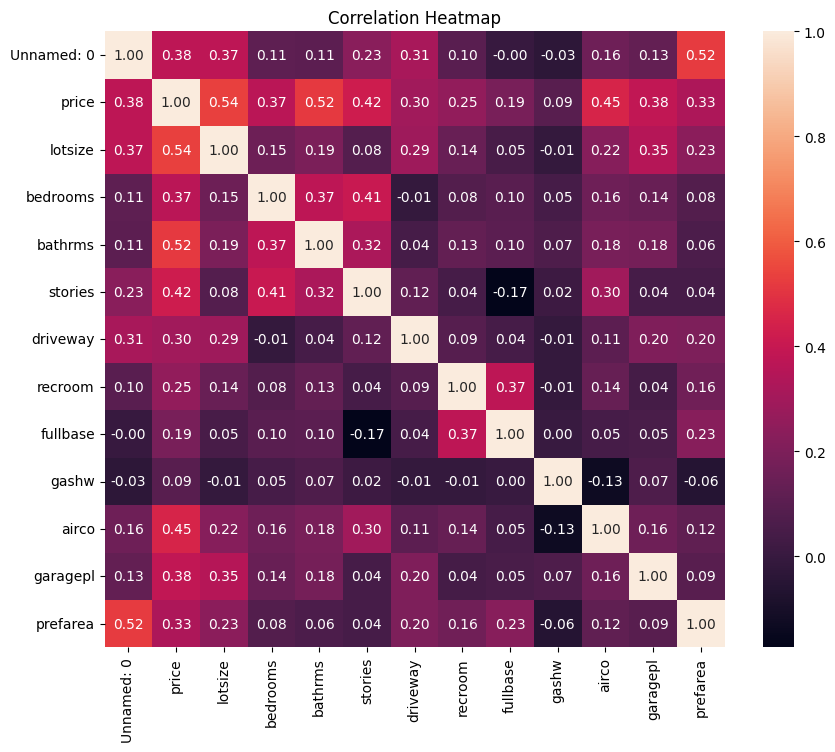

In [4]:
data = data.replace({'yes': 1, 'no': 0})

numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [5]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_cols.remove('price')  

numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_preprocessor, numerical_cols),
    ('cat', categorical_preprocessor, categorical_cols)
])

In [6]:
X = data.drop('price', axis=1)
y = data['price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f'Training samples: {X_train.shape[0]}')
print(f'Testing samples: {X_test.shape[0]}')

Training samples: 436
Testing samples: 110


In [8]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Unnamed: 0', 'lotsize',
                                                   'bedrooms', 'bathrms',
                                                   'stories', 'driveway',
                                                   'recroom', 'fullbase',
                                                   'gashw', 'airco', 'garagepl',
                                                   'prefarea']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('regressor', LinearRegression())])

In [9]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Unnamed: 0', 'lotsize',
                                                   'bedrooms', 'bathrms',
                                                   'stories', 'driveway',
                                                   'recroom', 'fullbase',
                                                   'gashw', 'airco', 'garagepl',
                                                   'prefarea']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [10]:
def evaluate_model(pipeline, X_test, y_test, model_name):
    predictions = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'{model_name} Performance:')
    print(f' - Mean Squared Error: {mse:.2f}')
    print(f' - R-squared: {r2:.2f}\n')
    return mse, r2

lr_mse, lr_r2 = evaluate_model(lr_pipeline, X_test, y_test, 'Linear Regression')

dt_mse, dt_r2 = evaluate_model(dt_pipeline, X_test, y_test, 'Decision Tree Regression')

Linear Regression Performance:
 - Mean Squared Error: 254583183.33
 - R-squared: 0.62

Decision Tree Regression Performance:
 - Mean Squared Error: 588472868.64
 - R-squared: 0.12



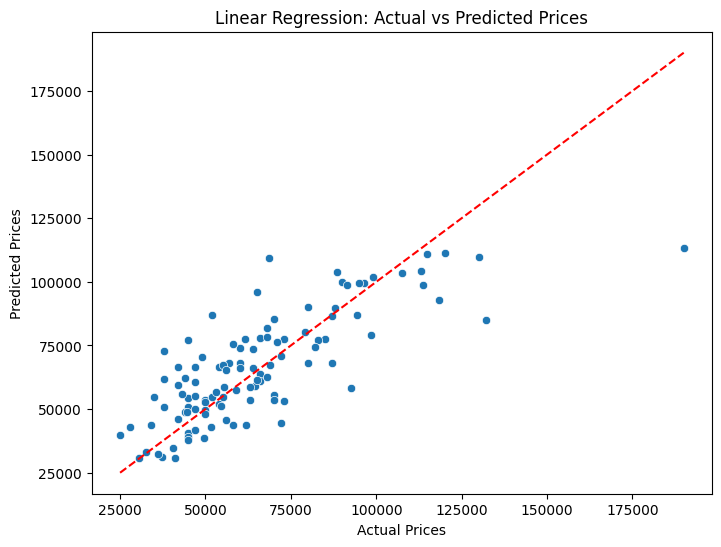

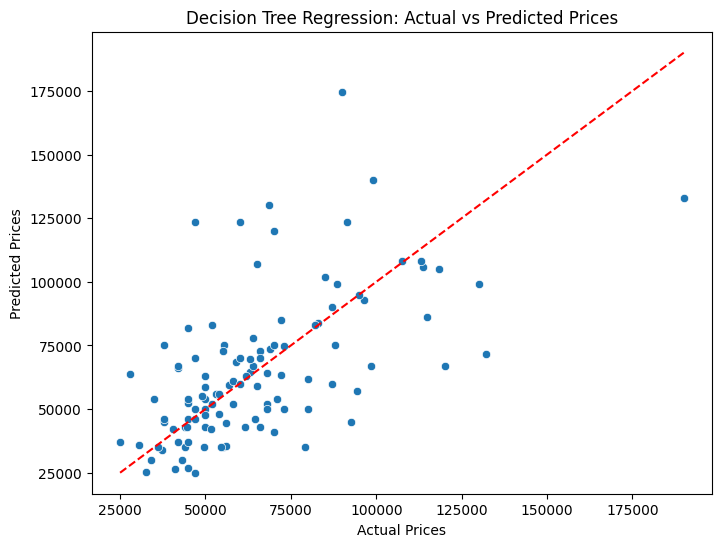

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=lr_pipeline.predict(X_test))
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=dt_pipeline.predict(X_test))
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree Regression: Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

In [12]:
best_model = dt_pipeline

import joblib
joblib.dump(best_model, 'house_price_model.joblib')
print("Model saved as 'house_price_model.joblib'")

Model saved as 'house_price_model.joblib'


In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    dt_pipeline, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best CV MSE: {-grid_search.best_score_:.2f}')

Best parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 10}
Best CV MSE: 468042497.48
